In [69]:
import numpy as np
import bilby
import corner
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

## $e_0 = 0.01$

In [74]:
# TaylorF2Ecck
result_ecck_0p01 = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass1 = result_ecck_0p01.posterior["chirp_mass"].values
mass_ratio1 =  result_ecck_0p01.posterior["mass_ratio"].values
e01 = result_ecck_0p01.posterior["eccentricity"].values
m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)
mtot1 = m11 + m21
eta1 = (m11*m21)/(mtot1**2)

# TaylorF2Ecc 3PN
result_ecc_0p01 = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecc_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass2 = result_ecc_0p01.posterior["chirp_mass"].values
mass_ratio2 =  result_ecc_0p01.posterior["mass_ratio"].values
e02 = result_ecc_0p01.posterior["eccentricity"].values
m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)
mtot2 = m12 + m22
eta2 = (m12*m22)/(mtot2**2)

# TaylorF2
result_tf2_0p01 = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_tf2_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass3 = result_tf2_0p01.posterior["chirp_mass"].values
mass_ratio3 =  result_tf2_0p01.posterior["mass_ratio"].values
# put some random eccentricity as TaylorF2 has no eccentricity
e03 = np.random.normal(-0.01, 0.001, size=len(chirp_mass3))
m13 = (chirp_mass3*(1+mass_ratio3)**(1/5))/mass_ratio3**(3/5)
m23 = chirp_mass3*mass_ratio3**(2/5)*(1+mass_ratio3)**(1/5)
mtot3 = m13 + m23
eta3 = (m13*m23)/(mtot3**2)

# injected values
chirp_mass_injected = result_ecck_0p01.injection_parameters['chirp_mass']
mass_ratio_injected = result_ecck_0p01.injection_parameters['mass_ratio']
mtot_injected = result_ecck_0p01.injection_parameters['total_mass']
e0_injected = result_ecck_0p01.injection_parameters['eccentricity']
# calculate symmetric mass ratio using chirp_mass_injected and mtot_injected
eta_injected = (chirp_mass_injected / mtot_injected) ** (5 / 3)

In [77]:
result_ecck_0p01.log_10_bayes_factor-result_tf2_0p01.log_10_bayes_factor

0.1954032613873551

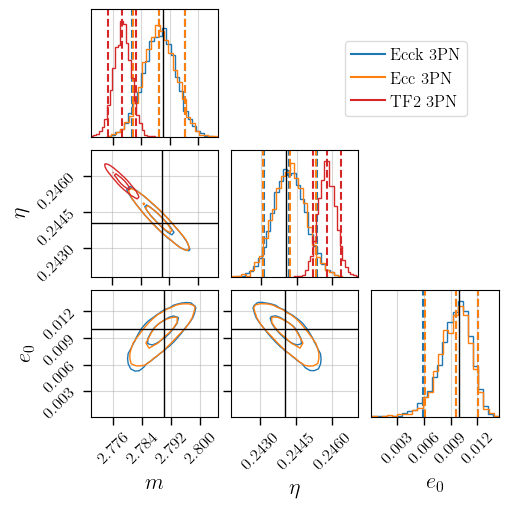

In [71]:
data1 = np.transpose(np.array([mtot1, eta1, e01]))
data2 = np.transpose(np.array([mtot2, eta2, e02]))
data3 = np.transpose(np.array([mtot3, eta3, e03]))

ndim = 3
# Setup the figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
fig, axes = plt.subplots(ndim, ndim, figsize=(5, 5), gridspec_kw={"hspace": 0.1, "wspace": 0.1})

corner.corner(data1, fig=fig,color = 'C0', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

corner.corner(data2, fig=fig, color='C1', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

corner.corner(data3, fig=fig, color='C3', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

# x-axis labels
size_axis_label = 16
axes[2][0].set_xlabel(r'$m$', fontsize=size_axis_label)
axes[2][0].set_xlim(min(mtot1.tolist()+mtot2.tolist()+mtot3.tolist()), max(mtot1.tolist()+mtot2.tolist()+mtot3.tolist()))
axes[2][1].set_xlabel(r'$\eta$', fontsize=size_axis_label)
axes[2][1].set_xlim(min(eta1.tolist()+eta2.tolist()+eta3.tolist()), max(eta1.tolist()+eta2.tolist()+eta3.tolist()))
axes[2][2].set_xlabel(r'$e_0$', fontsize=size_axis_label)
axes[2][2].set_xlim(min(e01.tolist()+e02.tolist()), max(e01.tolist()+e02.tolist()))
# y-axis labels
axes[1][0].set_ylabel(r'$\eta$', fontsize=size_axis_label)
axes[1][0].set_ylim(min(eta1.tolist()+eta2.tolist()+eta3.tolist()), max(eta1.tolist()+eta2.tolist()+eta3.tolist()))
axes[2][0].set_ylabel(r'$e_0$', fontsize=size_axis_label)
axes[2][0].set_ylim(min(e01.tolist()+e02.tolist()), max(e01.tolist()+e02.tolist()))
axes[2][1].set_ylim(min(e01.tolist()+e02.tolist()), max(e01.tolist()+e02.tolist()))

# injected values
# Loop over the diagonal
value1 = [mtot_injected, eta_injected, e0_injected]
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="k", linewidth=1)
# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="k", linewidth=1)
        ax.axhline(value1[yi], color="k", linewidth=1)
        ax.plot(value1[xi], value1[yi], "k", linewidth=1)

# add grid
for i in range(ndim):
    for j in range(ndim):
        if axes[i, j] is not None:
            axes[i, j].grid(True, which="both", ls="-", alpha=0.5)


# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C1', label='Ecc 3PN')
red_line = mlines.Line2D([], [], color='C3', label='TF2 3PN')
handles = [blue_line, orange_line, red_line]
labels = [h.get_label() for h in handles]
legend = fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1, frameon=True, edgecolor='lightgray')
# # rounded box for legend
legend.get_frame().set_boxstyle('Round', pad=0.0, rounding_size=0.2)
plt.savefig("injection_recovery_Ecck_vs_Ecc_e0_0p01_GW170817.pdf", bbox_inches="tight", dpi=300)
plt.show()

## $e_0 = 0.1$

In [72]:
# TaylorF2Ecck 3PN
result_ecck_0p10 = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p10_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass1 = result_ecck_0p10.posterior["chirp_mass"].values
mass_ratio1 =  result_ecck_0p10.posterior["mass_ratio"].values
e01 = result_ecck_0p10.posterior["eccentricity"].values
m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)
mtot1 = m11 + m21
eta1 = (m11*m21)/(mtot1**2)

# TaylorF2Ecc
result_ecc_0p10 = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecc_recovery_e0_0p10_data0_1126259642-413_analysis_H1L1_result.hdf5")
chirp_mass2 = result_ecc_0p10.posterior["chirp_mass"].values
mass_ratio2 =  result_ecc_0p10.posterior["mass_ratio"].values
e02 = result_ecc_0p10.posterior["eccentricity"].values
m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)
mtot2 = m12 + m22
eta2 = (m12*m22)/(mtot2**2)

# injected values
chirp_mass_injected = result_ecck_0p10.injection_parameters['chirp_mass']
mass_ratio_injected = result_ecck_0p10.injection_parameters['mass_ratio']
mtot_injected = result_ecck_0p10.injection_parameters['total_mass']
e0_injected = result_ecck_0p10.injection_parameters['eccentricity']
# calculate symmetric mass ratio using chirp_mass_injected and mtot_injected
eta_injected = (chirp_mass_injected / mtot_injected) ** (5 / 3)

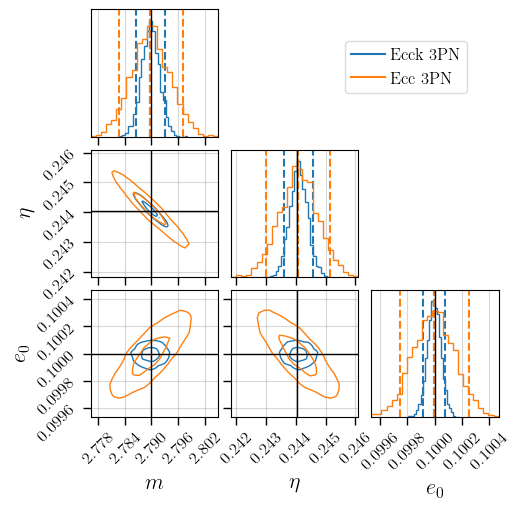

In [68]:
data1 = np.transpose(np.array([mtot1, eta1, e01]))
data2 = np.transpose(np.array([mtot2, eta2, e02]))

ndim = 3
# Setup the figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
fig, axes = plt.subplots(ndim, ndim, figsize=(5, 5), gridspec_kw={"hspace": 0.1, "wspace": 0.1})

corner.corner(data1, fig=fig,color = 'C0', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

corner.corner(data2, fig=fig, color='C1', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, quantiles=(0.05, 0.5, 0.95))

# x-axis labels
size_axis_label = 16
axes[2][0].set_xlabel(r'$m$', fontsize=size_axis_label)
axes[2][0].set_xlim(min(mtot1.tolist()+mtot2.tolist()), max(mtot1.tolist()+mtot2.tolist()))
axes[2][1].set_xlabel(r'$\eta$', fontsize=size_axis_label)
axes[2][1].set_xlim(min(eta1.tolist()+eta2.tolist()), max(eta1.tolist()+eta2.tolist()))
axes[2][2].set_xlabel(r'$e_0$', fontsize=size_axis_label)
axes[2][2].set_xlim(min(e01.tolist()+e02.tolist()), max(e01.tolist()+e02.tolist()))
# y-axis labels
axes[1][0].set_ylabel(r'$\eta$', fontsize=size_axis_label)
axes[1][0].set_ylim(min(eta1.tolist()+eta2.tolist()), max(eta1.tolist()+eta2.tolist()))
axes[2][0].set_ylabel(r'$e_0$', fontsize=size_axis_label)
axes[2][0].set_ylim(min(e01.tolist()+e02.tolist()), max(e01.tolist()+e02.tolist()))
axes[2][1].set_ylim(min(e01.tolist()+e02.tolist()), max(e01.tolist()+e02.tolist()))

# injected values
# Loop over the diagonal
value1 = [mtot_injected, eta_injected, e0_injected]
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="k", linewidth=1)
# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="k", linewidth=1)
        ax.axhline(value1[yi], color="k", linewidth=1)
        ax.plot(value1[xi], value1[yi], "k", linewidth=1)


# add grid
for i in range(ndim):
    for j in range(ndim):
        if axes[i, j] is not None:
            axes[i, j].grid(True, which="both", ls="-", alpha=0.5)

# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C1', label='Ecc 3PN')
handles = [blue_line, orange_line]
labels = [h.get_label() for h in handles]
legend = fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1, frameon=True, edgecolor='lightgray')
# # rounded box for legend
legend.get_frame().set_boxstyle('Round', pad=0.0, rounding_size=0.2)
plt.savefig("injection_recovery_Ecck_vs_Ecc_e0_0p10_GW170817.pdf", bbox_inches="tight", dpi=300)
plt.show()